In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("sales-funnel.xlsx")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


** Note **

For convenience sake, let’s define the status column as a category and set the order we want to view.

This isn’t strictly required but helps us keep the order we want as we work through analyzing the data.

In [3]:
df["Status"] = df["Status"].astype("category")
df["Status"].cat.set_categories(["won","pending","presented","declined"],inplace=True)

In [4]:
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


# Pivot the data

The simplest pivot table must have a dataframe and an index . In this case, let’s use the Name as our index.

In [5]:
pd.pivot_table(df,index=["Name"])

,Account,Price,Quantity
Name,,,
Barton LLC,740150.0,35000.0,1.000000
"Fritsch, Russel and Anderson",737550.0,35000.0,1.000000
Herman LLC,141962.0,65000.0,2.000000
Jerde-Hilpert,412290.0,5000.0,2.000000
"Kassulke, Ondricka and Metz",307599.0,7000.0,3.000000
Keeling LLC,688981.0,100000.0,5.000000
Kiehn-Spinka,146832.0,65000.0,2.000000
Koepp Ltd,729833.0,35000.0,2.000000
Kulas Inc,218895.0,25000.0,1.500000


You can have multiple indexes as well. In fact, most of the pivot_table args can take multiple values via a list.

In [6]:
pd.pivot_table(df,index=["Name","Rep","Manager"])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150.0,35000.0,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550.0,35000.0,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962.0,65000.0,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290.0,5000.0,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599.0,7000.0,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981.0,100000.0,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832.0,65000.0,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833.0,35000.0,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895.0,25000.0,1.500000


This is interesting but not particularly useful. What we probably want to do is look at this by Manager and Rep. It’s easy enough to do by changing the index .

In [7]:
pd.pivot_table(df,index=["Manager","Rep"])

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

You can see that the pivot table is smart enough to start aggregating the data and summarizing it by grouping the reps with their managers. Now we start to get a glimpse of what a pivot table can do for us.

In [8]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

** The price column automatically averages the data but we can do a count or a sum. Adding them is simple using aggfunc and np.sum .**

In [9]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

aggfunc can take a list of functions. Let’s try a mean using the numpy mean function and len to get a count.

In [10]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=[np.mean,len])

mean   len
                                    Price Price
Manager       Rep                              
Debra Henley  Craig Booker   20000.000000     4
              Daniel Hilton  38333.333333     3
              John Smith     20000.000000     2
Fred Anderson Cedric Moss    27500.000000     4
              Wendy Yule     44250.000000     4

** Columns vs. Values **

I think one of the confusing points with the pivot_table is the use of columns and values . Remember, columns are optional - they provide an additional way to segment the actual values you care about. The aggregation functions are applied to the values you list.

In [11]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],columns=["Product"],aggfunc=[np.sum])

sum                             
                                Price                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

** The NaN’s are a bit distracting. If we want to remove them, we could use fill_value to set them to 0. **

In [12]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],columns=["Product"],aggfunc=[np.sum],fill_value=0)

sum                             
                              Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

I think it would be useful to add the quantity as well. Add Quantity to the values list.

In [13]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price","Quantity"],columns=["Product"],aggfunc=[np.sum],fill_value=0)

sum                                        \
                              Price                              Quantity   
Product                         CPU Maintenance Monitor Software      CPU   
Manager       Rep                                                           
Debra Henley  Craig Booker    65000        5000       0    10000        2   
              Daniel Hilton  105000           0       0    10000        4   
              John Smith      35000        5000       0        0        1   
Fred Anderson Cedric Moss     95000        5000       0    10000        3   
              Wendy Yule     165000        7000    5000        0        7   

                                                          
                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker            2       0        1  
              Daniel Hilton           0       0        1  
              John Smith              2       0        0  
Fred Anderson Cedric Moss             1       0        1  
              Wendy Yule              3       2        0

What’s interesting is that you can move items to the index to get a different visual representation. Remove Product from the columns and add to the index .

In [14]:
pd.pivot_table(df,index=["Manager","Rep","Product"],values=["Price","Quantity"],aggfunc=[np.sum],fill_value=0)

sum         
                                          Price Quantity
Manager       Rep           Product                     
Debra Henley  Craig Booker  CPU           65000        2
                            Maintenance    5000        2
                            Software      10000        1
              Daniel Hilton CPU          105000        4
                            Software      10000        1
              John Smith    CPU           35000        1
                            Maintenance    5000        2
Fred Anderson Cedric Moss   CPU           95000        3
                            Maintenance    5000        1
                            Software      10000        1
              Wendy Yule    CPU          165000        7
                            Maintenance    7000        3
                            Monitor        5000        2

For this data set, this representation makes more sense. Now, what if I want to see some totals? margins=True does that for us.

In [15]:
pd.pivot_table(df,index=["Manager","Rep","Product"],values=["Price","Quantity"],aggfunc=[np.sum,np.mean],fill_value=0,margins=True)

sum                   mean  \
                                            Price Quantity         Price   
Manager       Rep           Product                                        
Debra Henley  Craig Booker  CPU           65000.0      2.0  32500.000000   
                            Maintenance    5000.0      2.0   5000.000000   
                            Software      10000.0      1.0  10000.000000   
              Daniel Hilton CPU          105000.0      4.0  52500.000000   
                            Software      10000.0      1.0  10000.000000   
              John Smith    CPU           35000.0      1.0  35000.000000   
                            Maintenance    5000.0      2.0   5000.000000   
Fred Anderson Cedric Moss   CPU           95000.0      3.0  47500.000000   
                            Maintenance    5000.0      1.0   5000.000000   
                            Software      10000.0      1.0  10000.000000   
              Wendy Yule    CPU          165000.0      7.0  82500.000000   
                            Maintenance    7000.0      3.0   7000.000000   
                            Monitor        5000.0      2.0   5000.000000   
All                                      522000.0     30.0  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

Let’s move the analysis up a level and look at our pipeline at the manager level. Notice how the status is ordered based on our earlier category definition.

In [16]:
pd.pivot_table(df,index=["Manager","Status"],values=["Price"],aggfunc=[np.sum],fill_value=0,margins=True)

sum
                            Price
Manager       Status             
Debra Henley  won         65000.0
              pending     50000.0
              presented   50000.0
              declined    70000.0
Fred Anderson won        172000.0
              pending      5000.0
              presented   45000.0
              declined    65000.0
All                      522000.0

A really handy feature is the ability to pass a dictionary to the aggfunc so you can perform different functions on each of the values you select. This has a side-effect of making the labels a little cleaner.

In [17]:
pd.pivot_table(df,index=["Manager","Status"],columns=["Product"],values=["Quantity","Price"],aggfunc={"Quantity":len,"Price":np.sum},fill_value=0)

Price                              Quantity  \
Product                     CPU Maintenance Monitor Software      CPU   
Manager       Status                                                    
Debra Henley  won         65000           0       0        0        1   
              pending     40000       10000       0        0        1   
              presented   30000           0       0    20000        1   
              declined    70000           0       0        0        2   
Fred Anderson won        165000        7000       0        0        2   
              pending         0        5000       0        0        0   
              presented   30000           0    5000    10000        1   
              declined    65000           0       0        0        1   

                                                      
Product                 Maintenance Monitor Software  
Manager       Status                                  
Debra Henley  won                 0       0        0  
              pending             2       0        0  
              presented           0       0        2  
              declined            0       0        0  
Fred Anderson won                 1       0        0  
              pending             1       0        0  
              presented           0       1        1  
              declined            0       0        0

You can provide a list of aggfunctions to apply to each value too:

In [18]:
table = pd.pivot_table(df,index=["Manager","Status"],columns=["Product"],values=["Quantity","Price"],aggfunc={"Quantity":len,"Price":[np.sum,np.mean]},fill_value=0)
table

Price                                       \
                          mean                                  sum   
Product                    CPU Maintenance Monitor Software     CPU   
Manager       Status                                                  
Debra Henley  won        65000           0       0        0   65000   
              pending    40000        5000       0        0   40000   
              presented  30000           0       0    10000   30000   
              declined   35000           0       0        0   70000   
Fred Anderson won        82500        7000       0        0  165000   
              pending        0        5000       0        0       0   
              presented  30000           0    5000    10000   30000   
              declined   65000           0       0        0   65000   

                                                     Quantity              \
                                                          len               
Product                 Maintenance Monitor Software      CPU Maintenance   
Manager       Status                                                        
Debra Henley  won                 0       0        0        1           0   
              pending         10000       0        0        1           2   
              presented           0       0    20000        1           0   
              declined            0       0        0        2           0   
Fred Anderson won              7000       0        0        2           1   
              pending          5000       0        0        0           1   
              presented           0    5000    10000        1           0   
              declined            0       0        0        1           0   

                                          
                                          
Product                 Monitor Software  
Manager       Status                      
Debra Henley  won             0        0  
              pending         0        0  
              presented       0        2  
              declined        0        0  
Fred Anderson won             0        0  
              pending         0        0  
              presented       1        1  
              declined        0        0

# Advanced Pivot Table Filtering

Once you have generated your data, it is in a DataFrame so you can filter on it using your standard DataFrame functions.

In [19]:
table.query('Manager == ["Debra Henley"]')

Price                                                  \
                         mean                                 sum               
Product                   CPU Maintenance Monitor Software    CPU Maintenance   
Manager      Status                                                             
Debra Henley won        65000           0       0        0  65000           0   
             pending    40000        5000       0        0  40000       10000   
             presented  30000           0       0    10000  30000           0   
             declined   35000           0       0        0  70000           0   

                                        Quantity                               
                                             len                               
Product                Monitor Software      CPU Maintenance Monitor Software  
Manager      Status                                                            
Debra Henley won             0        0        1           0       0        0  
             pending         0        0        1           2       0        0  
             presented       0    20000        1           0       0        2  
             declined        0        0        2           0       0        0

In [20]:
table.query('Status == ["pending","won"]')

Price                                                   \
                        mean                                  sum               
Product                  CPU Maintenance Monitor Software     CPU Maintenance   
Manager       Status                                                            
Debra Henley  won      65000           0       0        0   65000           0   
              pending  40000        5000       0        0   40000       10000   
Fred Anderson won      82500        7000       0        0  165000        7000   
              pending      0        5000       0        0       0        5000   

                                       Quantity                               
                                            len                               
Product               Monitor Software      CPU Maintenance Monitor Software  
Manager       Status                                                          
Debra Henley  won           0        0        1           0       0        0  
              pending       0        0        1           2       0        0  
Fred Anderson won           0        0        2           1       0        0  
              pending       0        0        0           1       0        0

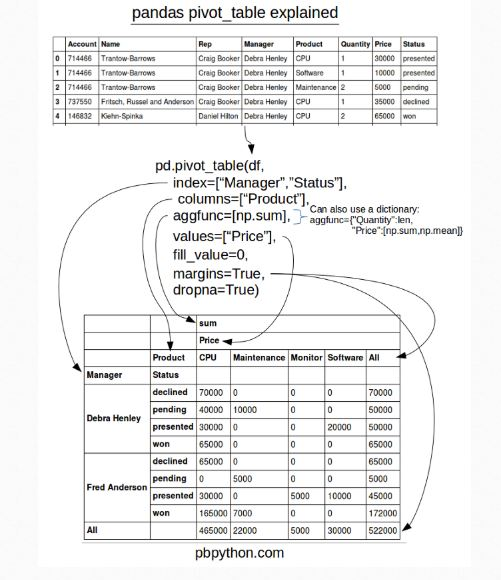